In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [2]:
diamond = pd.read_csv("Diamonds Prices2022.csv")
diamond.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


# 

# DATA CLEANING AND ANALYSIS


In [3]:
 diamond.shape

(53943, 11)

In [4]:
diamond.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53943 entries, 0 to 53942
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53943 non-null  int64  
 1   carat       53943 non-null  float64
 2   cut         53943 non-null  object 
 3   color       53943 non-null  object 
 4   clarity     53943 non-null  object 
 5   depth       53943 non-null  float64
 6   table       53943 non-null  float64
 7   price       53943 non-null  int64  
 8   x           53943 non-null  float64
 9   y           53943 non-null  float64
 10  z           53943 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [5]:
diamond.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000
mean,26972.000000,0.797935,61.749322,57.457251,3932.734294,5.731158,5.734526,3.538730
std,15572.147122,0.473999,1.432626,2.234549,3989.338447,1.121730,1.142103,0.705679
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13486.500000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26972.000000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40457.500000,1.040000,62.500000,59.000000,5324.000000,6.540000,6.540000,4.040000
max,53943.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [6]:
diamond= diamond.drop(["Unnamed: 0"], axis=1)


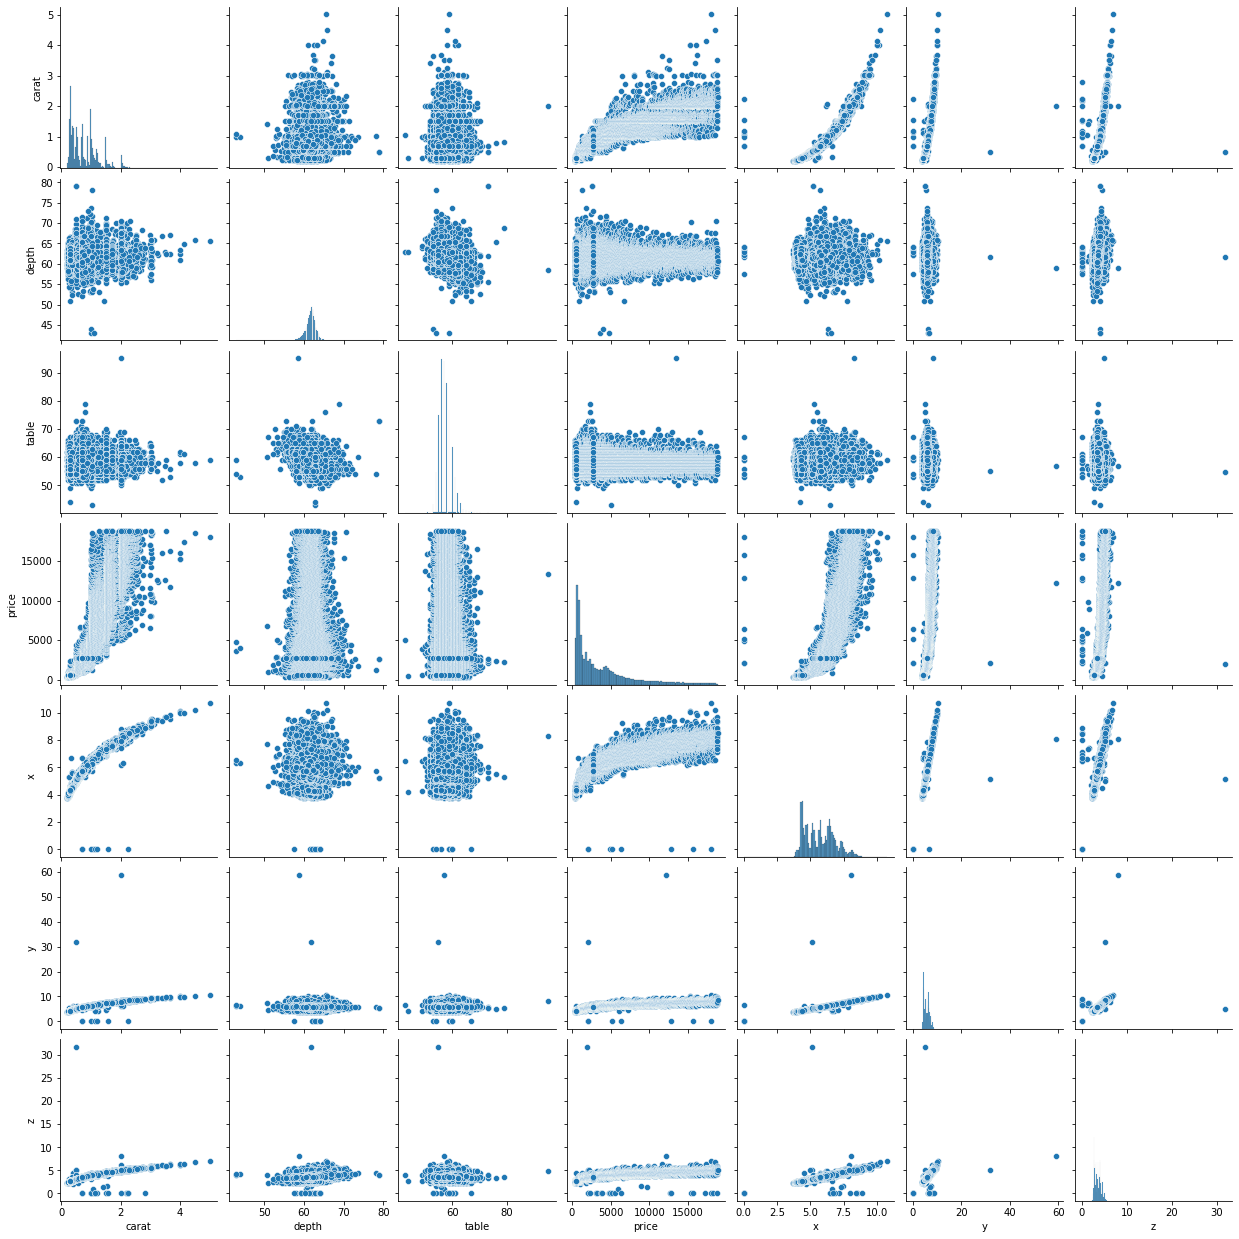

In [7]:
sns.pairplot(diamond)

### WITH THIS PAIR PLOT WE CAN EASILY IDENTIFY SOME OUTLIERS IN OUR DATA 

<AxesSubplot:xlabel='carat', ylabel='depth'>

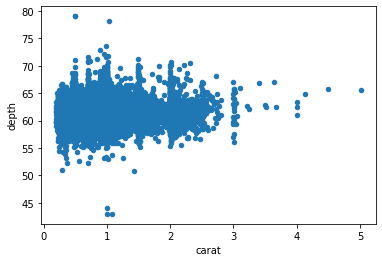

In [8]:
diamond.plot(kind="scatter",x= "carat", y= "depth")

In [9]:
diamond=diamond[(diamond["depth"]<75) & (diamond["depth"]>45)]
diamond=diamond[(diamond["table"]<80) & (diamond["table"]>40)] 
diamond=diamond[(diamond["x"]>2)]
diamond=diamond[(diamond["y"]<20)]
diamond=diamond[(diamond["z"]<25)]

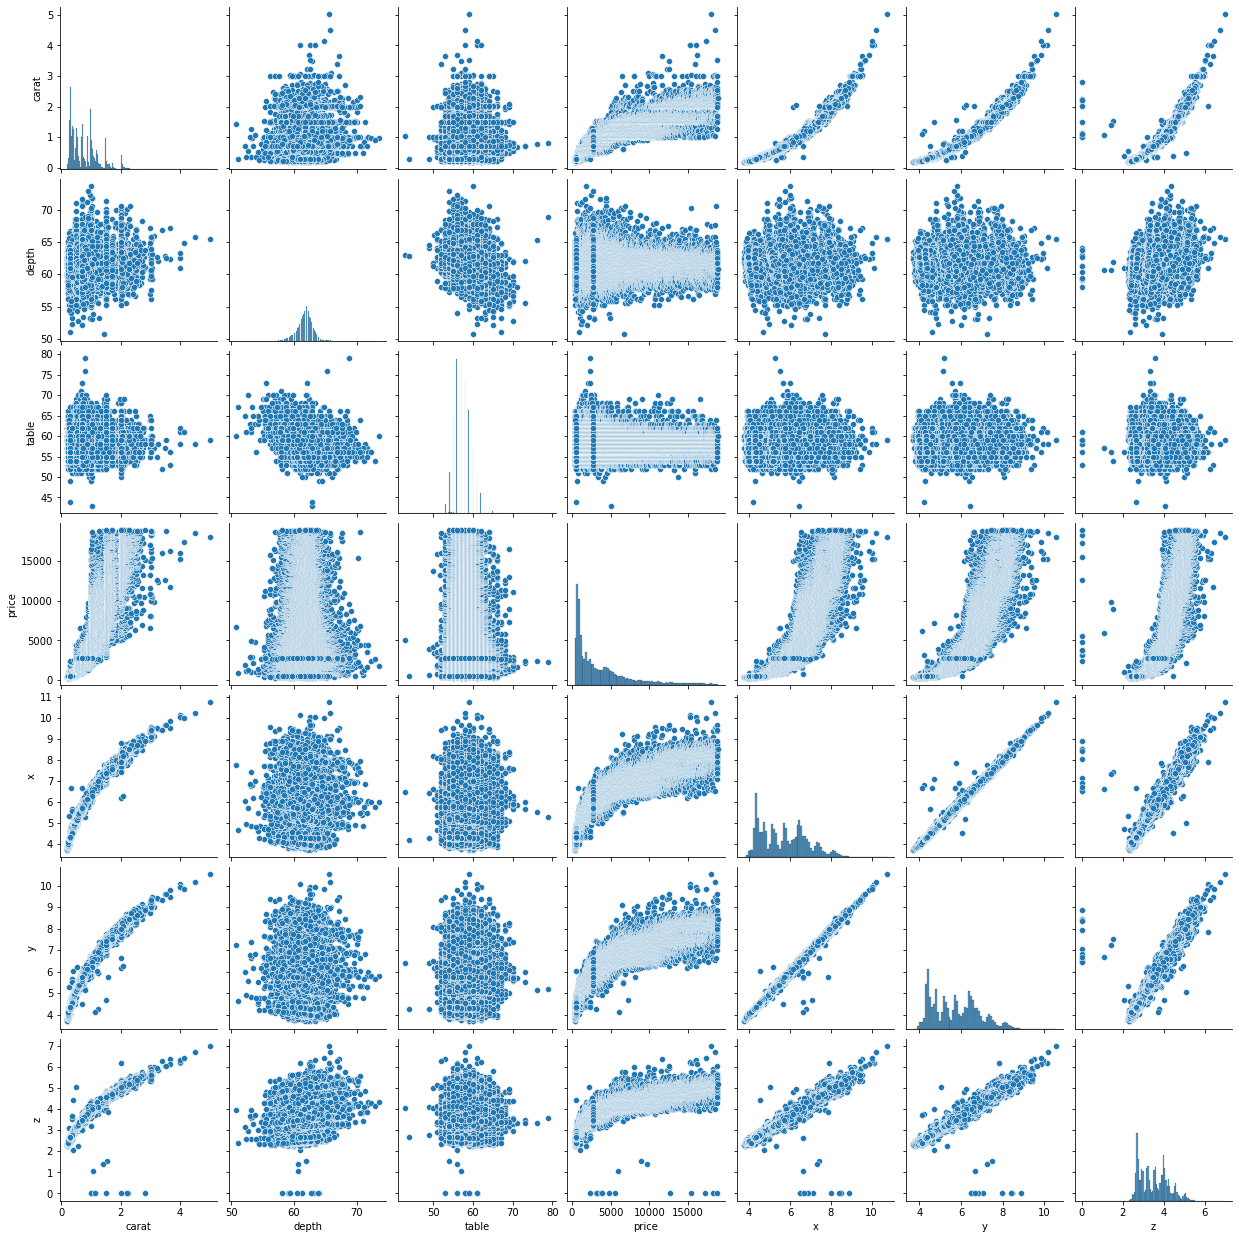

In [10]:
sns.pairplot(diamond)

### observe that there are some values of x,y,z that are 0. we need to remove such values.

In [11]:
diamond=diamond.drop(diamond[diamond["x"]== 0].index)

In [12]:
diamond=diamond.drop(diamond[diamond["y"]== 0].index)

In [13]:
diamond=diamond.drop(diamond[diamond["z"]== 0].index)

In [14]:
diamond.shape

(53913, 10)

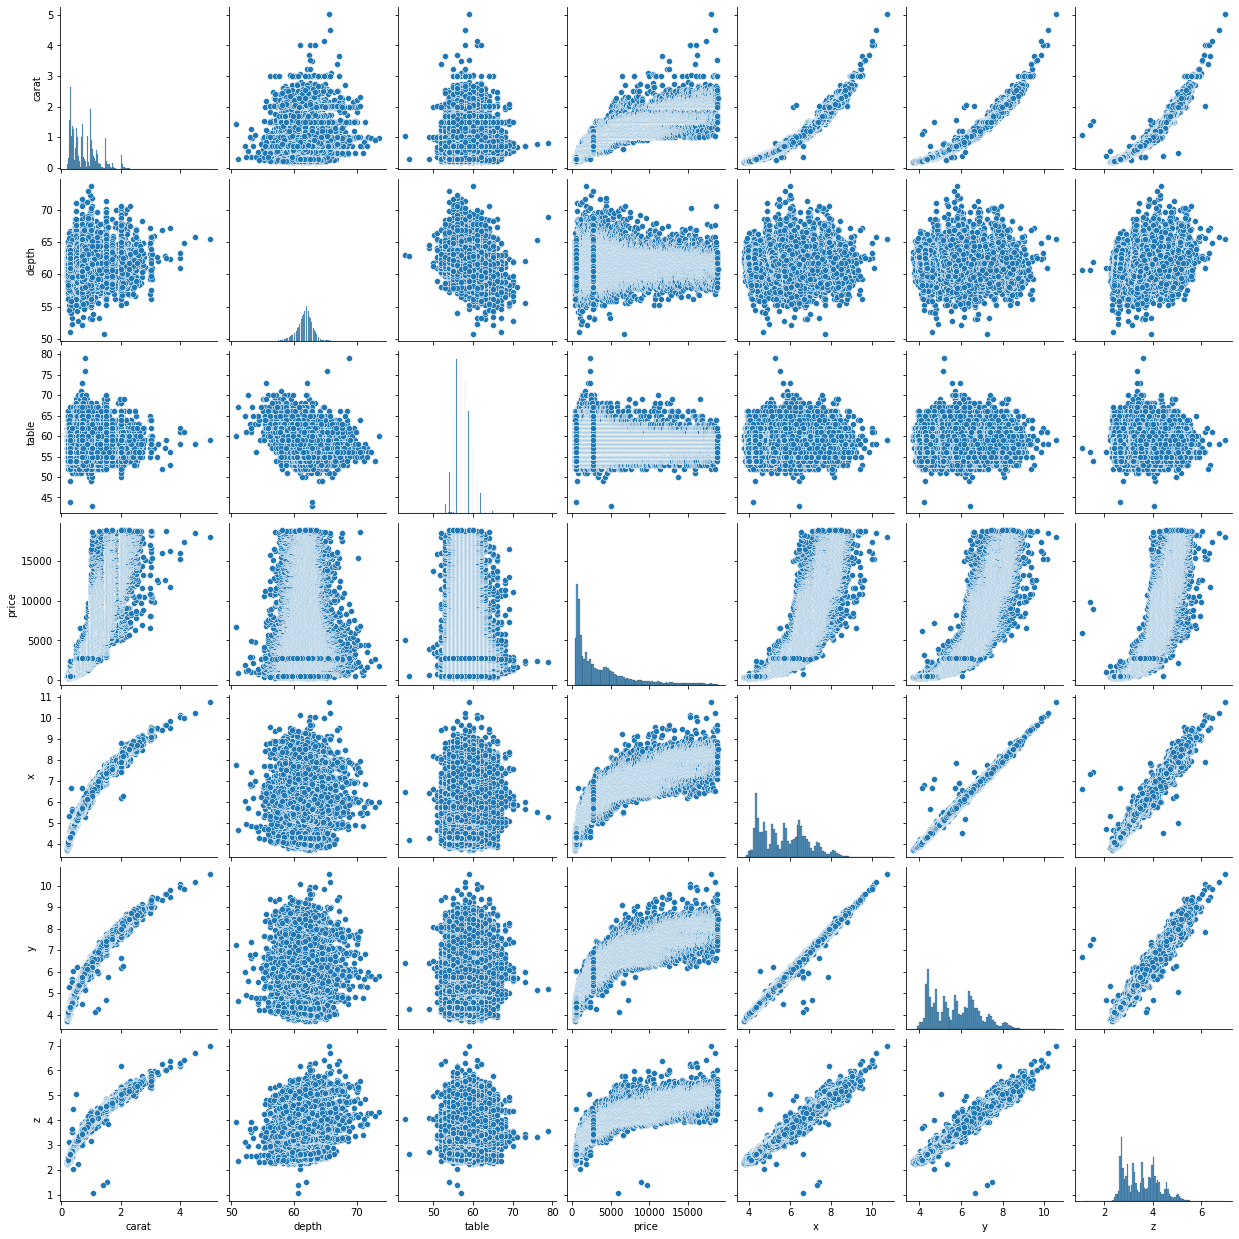

In [15]:
sns.pairplot(diamond)

### DATA ANALYSIS: WE ARE TO PREDICT THE PRICE OF THE COMMODITY

In [16]:
diamond.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [17]:
diamond["color"].value_counts()

G    11282
E     9794
F     9538
H     8297
D     6774
I     5421
J     2807
Name: color, dtype: int64

<AxesSubplot:xlabel='color', ylabel='price'>

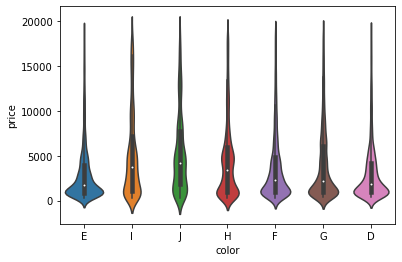

In [18]:
sns.violinplot( x= "color", y="price", data= diamond, title= "Graph of price and color relationship")

### the price is dispersed most around 0 to 10000. T

<AxesSubplot:xlabel='cut', ylabel='price'>

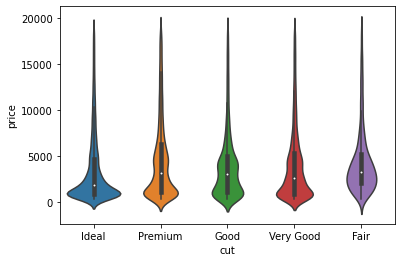

In [19]:
sns.violinplot( x= "cut", y="price", data= diamond, title= "Graph of price and color relationship")

In [20]:
diamond["cut"].value_counts()

Ideal        21546
Premium      13781
Very Good    12081
Good          4902
Fair          1603
Name: cut, dtype: int64

In [21]:
diamond["clarity"].value_counts()

SI1     13063
VS2     12251
SI2      9184
VS1      8168
VVS2     5066
VVS1     3654
IF       1790
I1        737
Name: clarity, dtype: int64

<AxesSubplot:xlabel='clarity', ylabel='price'>

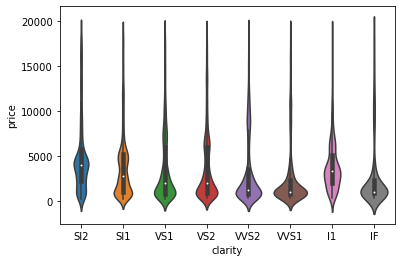

In [22]:
sns.violinplot( x= "clarity", y="price", data= diamond, title= "Graph of price and color relationship")

### Encoding categorical data

In [23]:
from sklearn.preprocessing import LabelEncoder


In [24]:
by= LabelEncoder()
diamond.iloc[:,1]=by.fit_transform(diamond.iloc[:,1])
diamond.iloc[:,2]=by.fit_transform(diamond.iloc[:,2])
diamond.iloc[:,3]=by.fit_transform(diamond.iloc[:,3])
diamond.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75


<AxesSubplot:>

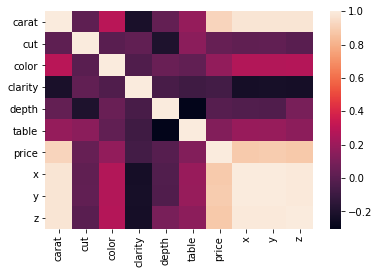

In [25]:
sns.heatmap(diamond.corr())

### From the heatmap, it is clear that x,y,z,carat are highly positively related to the price we are to predict.While cut, color,clarity, depth and table shows low correlatin relatonship. 

# 

# CONVERSION TO MACHINE LANGUAGE

In [26]:
from sklearn.preprocessing import MinMaxScaler
cols=["carat","cut","color","clarity","depth","table","price","x","y","z"]

In [27]:
ml= MinMaxScaler()
diamond=pd.DataFrame(ml.fit_transform(diamond),columns= cols)
diamond

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.006237,0.50,0.166667,0.428571,0.469298,0.333333,0.000000,0.031384,0.043732,0.230118
1,0.002079,0.75,0.166667,0.285714,0.394737,0.500000,0.000000,0.022825,0.023324,0.209814
2,0.006237,0.25,0.166667,0.571429,0.267544,0.611111,0.000054,0.045649,0.056851,0.209814
3,0.018711,0.75,0.833333,0.714286,0.508772,0.416667,0.000433,0.067047,0.080175,0.263959
4,0.022869,0.25,1.000000,0.428571,0.548246,0.416667,0.000487,0.087019,0.097668,0.284264
...,...,...,...,...,...,...,...,...,...,...
53908,0.137214,0.75,0.666667,0.428571,0.447368,0.416667,0.131427,0.345221,0.355685,0.451777
53909,0.114345,0.50,0.000000,0.428571,0.500000,0.333333,0.131427,0.299572,0.319242,0.434856
53910,0.106029,0.75,0.166667,0.285714,0.425439,0.333333,0.131373,0.293866,0.300292,0.409475
53911,0.106029,0.75,0.333333,0.285714,0.394737,0.527778,0.131373,0.286733,0.298834,0.399323


## SPLITTING COLUMNS

In [28]:
X= diamond.drop(["price"],axis=1)
Y=diamond.iloc[:,6]

In [29]:
Y

0        0.000000
1        0.000000
2        0.000054
3        0.000433
4        0.000487
           ...   
53908    0.131427
53909    0.131427
53910    0.131373
53911    0.131373
53912    0.131427
Name: price, Length: 53913, dtype: float64

In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size=0.2)

# RUNNING ALGORITHMS HERE WE ARE TO PREDICT A VALUE. I WILL BE USING SUPERVISED LERNING. LINEAR REGRESSION, LASSO, XGBOOST,

# 

## 1. LINEAR REGRESSION

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
lr= LinearRegression()
lrp= lr.fit(x_train,y_train)

In [33]:
 predicted_value=lrp.predict(x_test)

In [34]:
df=pd.DataFrame({'Actual ': y_test, 'Predicted': predicted_value })

In [35]:
df

,Actual,Predicted
39725,0.041520,0.023854
2099,0.150727,0.231809
16485,0.338812,0.354385
12805,0.271341,0.247450
29322,0.020111,0.004328
...,...,...
24214,0.653998,0.736154
18657,0.394983,0.325842
13945,0.289344,0.333188
27512,0.970968,0.793311


### Error measure

In [36]:
print("mean absolute error:  ", metrics.mean_absolute_error(y_test, predicted_value))
print("mean squared error:  ", metrics.mean_squared_error(y_test, predicted_value))
print("Root mean squared error:  ", np.sqrt(metrics.mean_squared_error(y_test, predicted_value)))

mean absolute error:   0.0463622638181103
mean squared error:   0.005364552025194074
Root mean squared error:   0.07324310223627939


## 2. LASSO

In [37]:
from sklearn.linear_model import Lasso

In [38]:
las= Lasso()
lasp= las.fit(x_train,y_train)

In [39]:
predicted_value2= lasp.predict(x_test)

In [40]:
df2= pd.DataFrame({'Actual':y_test, 'Predicted':predicted_value2})
df2

,Actual,Predicted
39725,0.041520,0.19487
2099,0.150727,0.19487
16485,0.338812,0.19487
12805,0.271341,0.19487
29322,0.020111,0.19487
...,...,...
24214,0.653998,0.19487
18657,0.394983,0.19487
13945,0.289344,0.19487
27512,0.970968,0.19487


### Error measure

In [41]:
print("mean absolute error:  ", metrics.mean_absolute_error(y_test, predicted_value2))
print("mean squared error:  ", metrics.mean_squared_error(y_test, predicted_value2))
print("Root mean squared error:  ", np.sqrt(metrics.mean_squared_error(y_test, predicted_value2)))

mean absolute error:   0.16472895542148758
mean squared error:   0.047366330131078924
Root mean squared error:   0.21763807141922326


## 3. XGBOOST

In [42]:
from xgboost import XGBRegressor

In [43]:
xgb = XGBRegressor()

In [44]:
xgbp= xgb.fit(x_train, y_train)

In [45]:
predicted_value3=xgbp.predict(x_test)

In [46]:
df3= pd.DataFrame({'Actual':y_test, 'Predicted':predicted_value3})
df3

,Actual,Predicted
39725,0.041520,0.037586
2099,0.150727,0.195792
16485,0.338812,0.341979
12805,0.271341,0.249537
29322,0.020111,0.020496
...,...,...
24214,0.653998,0.736921
18657,0.394983,0.398041
13945,0.289344,0.347913
27512,0.970968,0.870715


### Error measure 

In [47]:
print("mean absolute error : ", metrics.mean_absolute_error(y_test,predicted_value3))
print("mean squared error:  ", metrics.mean_squared_error(y_test, predicted_value3))
print("Root mean squared error:  ", np.sqrt(metrics.mean_squared_error(y_test, predicted_value3)))

mean absolute error :  0.0151937188228221
mean squared error:   0.0008849737328186939
Root mean squared error:   0.029748508077190927


In [48]:
SA= pd.DataFrame({"MODEL": ["LINEAR MODEL", "LASSO","XGBOOST"],
    "mean absolute error": [metrics.mean_absolute_error(y_test,predicted_value),
                            metrics.mean_absolute_error(y_test,predicted_value2),
                            metrics.mean_absolute_error(y_test,predicted_value3)],
    "mean squared error": [metrics.mean_squared_error(y_test,predicted_value),
                           metrics.mean_squared_error(y_test,predicted_value2),
                           metrics.mean_squared_error(y_test,predicted_value3)]})

In [49]:
SA

,MODEL,mean absolute error,mean squared error
0,LINEAR MODEL,0.046362,0.005365
1,LASSO,0.164729,0.047366
2,XGBOOST,0.015194,0.000885


##  FROM THE TABLE ABOVE, IT IS CLEAR THAT XGBOOST HAS THE BEST PREDICTED VALUE. THEREFORE, IT SOLICIT TO WORK ON THE PREDICTION.

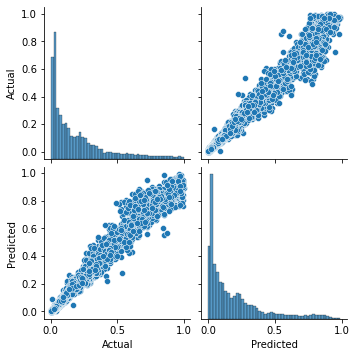

In [50]:
df3= pd.DataFrame({'Actual':y_test, 'Predicted':predicted_value3})
sns.pairplot(df3)

## PREDICTING CUSTOMER DATA

In [51]:
df3= pd.DataFrame({'Actual':y_test,'ACTUAL PRICE': round(y_test*100,2),
                   'Predicted':predicted_value3, 'Predicted PRICE': predicted_value3*100})
df3

,Actual,ACTUAL PRICE,Predicted,Predicted PRICE
39725,0.041520,4.15,0.037586,3.758641
2099,0.150727,15.07,0.195792,19.579226
16485,0.338812,33.88,0.341979,34.197945
12805,0.271341,27.13,0.249537,24.953663
29322,0.020111,2.01,0.020496,2.049555
...,...,...,...,...
24214,0.653998,65.40,0.736921,73.692146
18657,0.394983,39.50,0.398041,39.804138
13945,0.289344,28.93,0.347913,34.791279
27512,0.970968,97.10,0.870715,87.071480
